In [1]:
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

In [4]:
from dependence.tests.test_functions import func_spec

test_func = func_spec
dim = 2

In [10]:
margins = [ot.Uniform(-3, 1.), ot.Uniform(-1, 3.)]
dim = len(margins)

We chose the coefficients of the variables throught the additive function.

## Estimations
We create an instance of the main class for conservative estimate, and we define a q_func object for the quantile as a quantity of interest

In [19]:
from dependence import ConservativeEstimate, quantile_func

alpha = 0.05

if alpha > 0.5: # Maximizing the quantile
    def q_func(x, axis=1):
        return - quantile_func(alpha)(x, axis=axis)
else: # Minimizing
    q_func = quantile_func(alpha)

In [68]:
from dependence.utils import get_grid_sample, to_copula_params
from dependence.dependence_plot import plot_variation, compute_influence
K = 8
n = 500000

copulas = {'Normal': [1, 1],
           'Clayton': [3, 23],
           'Gumbel': [14, 24],
           'Joe': [16, 26]}

families = np.zeros((dim, dim))
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
kendalls, output_samples = compute_influence(quant_estimate, K, n, copulas, pair=[1, 0])

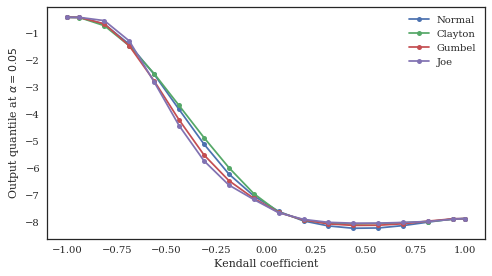

In [69]:
ylabel = 'Output quantile at $\\alpha=%.2f$' % (alpha)
plot_area = 'full'
plot_variation(output_samples, kendalls, q_func, plot_area=plot_area, ylabel=ylabel)
plt.savefig('./output/non_monotonic_variation_quantile_n_%d_%s.pdf' % (n, plot_area))

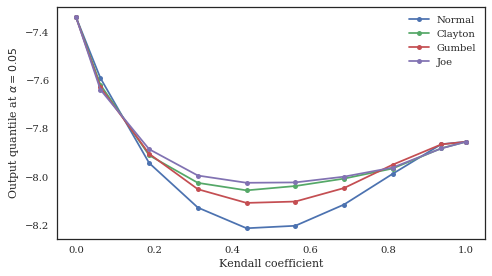

In [70]:
plot_area = 'right'
plot_variation(output_samples, kendalls, q_func, plot_area=plot_area, ylabel=ylabel)
plt.savefig('./output/non_monotonic_variation_quantile_n_%d_%s.pdf' % (n, plot_area))